In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [135]:
homePath = "data"
trainDataPath = os.path.join(homePath, "train.csv")
testDataPath = os.path.join(homePath, "test.csv")
trainData = pd.read_csv(trainDataPath)
testData = pd.read_csv(testDataPath)

In [136]:
y = trainData['y']
# trainData.drop('id', axis=1, inplace=True)

# trainData = pd.concat([trainData, testData], axis=0, ignore_index=True)
len(trainData)

652936

In [137]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652936 entries, 0 to 652935
Data columns (total 15 columns):
id                   652936 non-null int64
district_id          652936 non-null int64
area_id              652936 non-null int64
floors_before        652936 non-null int64
floors_after         652936 non-null int64
age                  652936 non-null int64
area                 652936 non-null int64
height_before        652936 non-null int64
height_after         652936 non-null int64
land_condition       652936 non-null object
foundation_type      652936 non-null object
roof_type            652936 non-null object
ground_floor_type    652936 non-null object
position             652936 non-null object
y                    652936 non-null int64
dtypes: int64(10), object(5)
memory usage: 74.7+ MB


### district_id
离散化

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


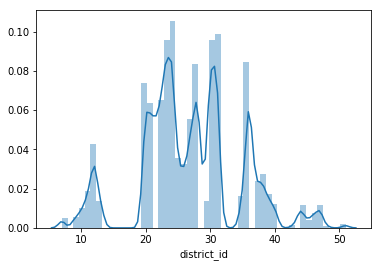

In [138]:
sns.distplot(trainData['district_id'])

In [139]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=6, init="k-means++", n_jobs=-1)
est.fit(trainData['district_id'].reshape(-1, 1))
trainData['district_id'] = est.predict(trainData['district_id'].reshape(-1, 1))

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


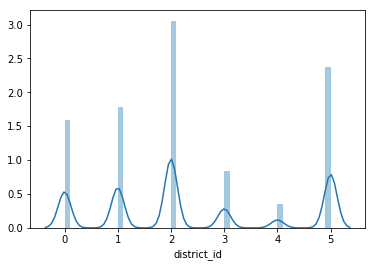

In [140]:
sns.distplot(trainData['district_id'])

### area_id
离散化

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


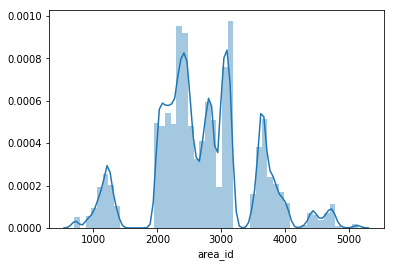

In [141]:
sns.distplot(trainData['area_id'])

In [142]:
est = KMeans(n_clusters=6, init="k-means++", n_jobs=-1)
est.fit(trainData['area_id'].reshape(-1, 1))
trainData['area_id'] = est.predict(trainData['area_id'].reshape(-1, 1))

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


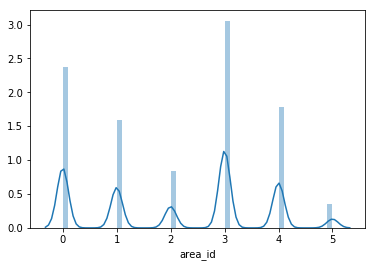

In [143]:
sns.distplot(trainData['area_id'])

### floors_before

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


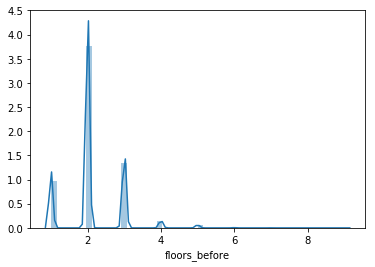

In [144]:
sns.distplot(trainData['floors_before'])

In [145]:
trainData['floors_before'].describe()

count    652936.000000
mean          2.131408
std           0.727938
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: floors_before, dtype: float64

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


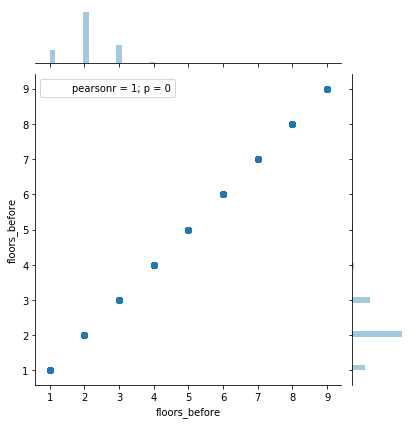

In [146]:
sns.jointplot(data=trainData, x='floors_before', y='floors_before')

### floors_after

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


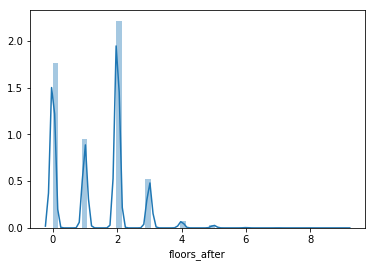

In [147]:
sns.distplot(trainData['floors_after'])

In [148]:
trainData['floors_after'].describe()

count    652936.000000
mean          1.335198
std           1.097675
min           0.000000
25%           0.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: floors_after, dtype: float64

### 对比前后楼层

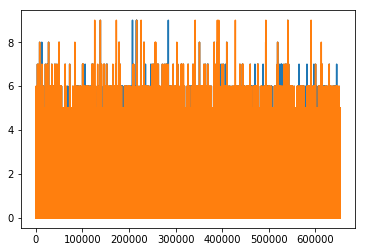

In [149]:
plt.plot(trainData['id'], trainData['floors_before'], trainData['id'], trainData['floors_after'])

In [150]:
error_floor = trainData['floors_before'] < trainData['floors_after']

In [151]:
# 震后楼层数比震前还高的数量
error_floor.sum()

1838

In [152]:
# 直接去掉
index = trainData['floors_before'] >= trainData['floors_after']
trainData = trainData[index]

### age

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


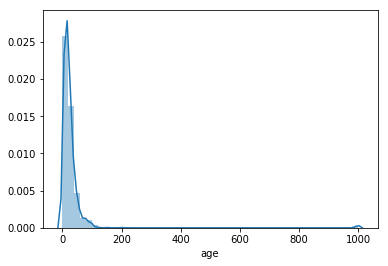

In [153]:
sns.distplot(trainData['age'])

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


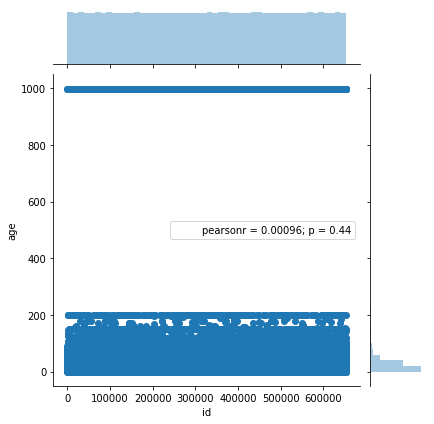

In [154]:
sns.jointplot(data=trainData, x='id', y='age')

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


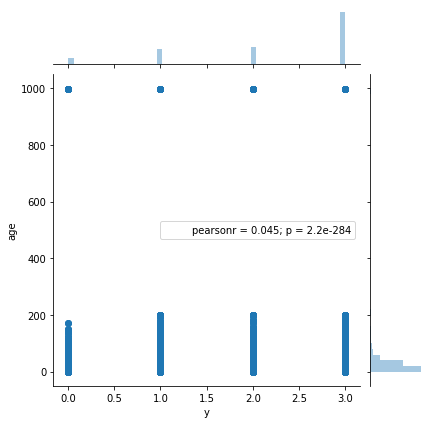

In [155]:
sns.jointplot(data=trainData, x='y', y='age')

In [156]:
trainData['age'].describe()

count    651098.000000
mean         27.823566
std          73.138974
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max         999.000000
Name: age, dtype: float64

In [157]:
error_age = trainData['age'] > 176
error_age.sum()

3725

In [158]:
# 删除大于阈值的行
index = trainData['age'] <= 176
trainData = trainData[index]

### area(暂未处理)

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


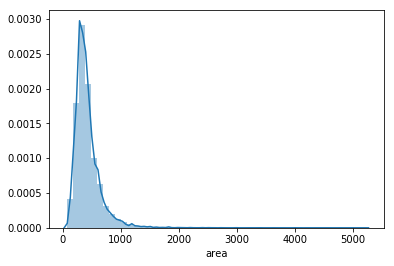

In [159]:
sns.distplot(trainData['area'])

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


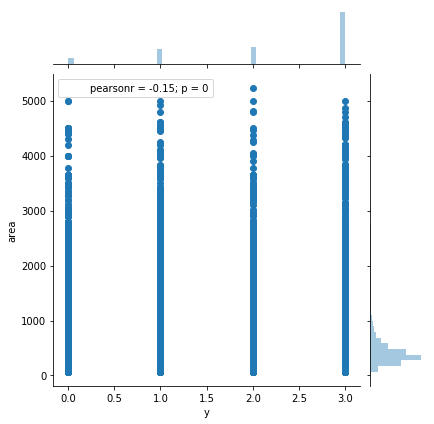

In [160]:
sns.jointplot(data=trainData, x='y', y='area')

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


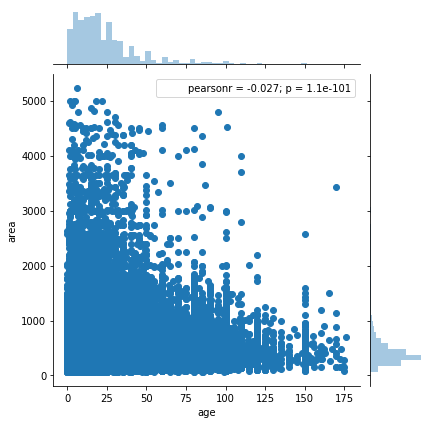

In [161]:
sns.jointplot(data=trainData, x='age', y='area')

In [162]:
trainData['area'].describe()

count    647373.000000
mean        417.953969
std         231.277419
min          70.000000
25%         284.000000
50%         364.000000
75%         493.000000
max        5220.000000
Name: area, dtype: float64

In [163]:
# 异常值数量
error_area = trainData['area'] > 4000
error_area.sum()

82

### 删除height_after 大于 height_before

In [164]:
error_height = trainData['height_after'] > trainData['height_before']
error_height.sum()

1517

In [165]:
index = trainData['height_after'] <= trainData['height_before']
trainData = trainData[index]

### height_before

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


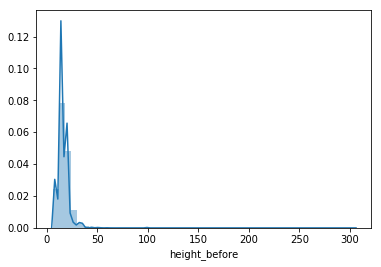

In [166]:
sns.distplot(trainData['height_before'])

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


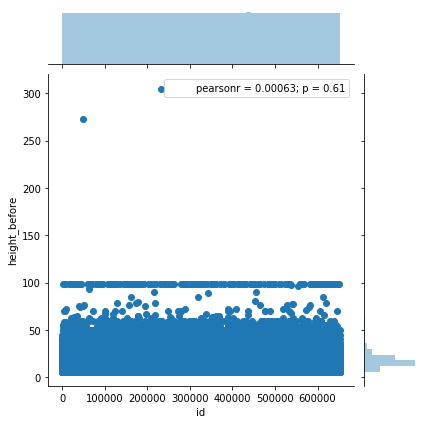

In [167]:
sns.jointplot(data=trainData, x='id', y='height_before')

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


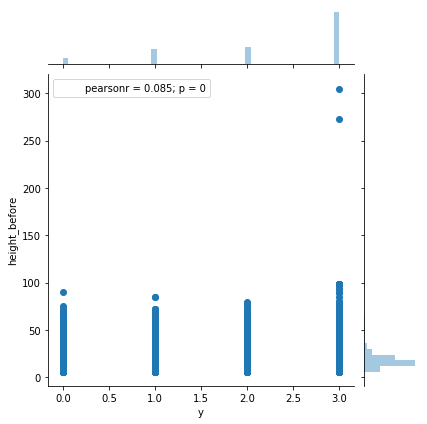

In [168]:
sns.jointplot(data=trainData, x='y', y='height_before')

In [169]:
# 异常值数量
error_height_before = trainData['height_before'] >= 50
error_height_before.sum()

869

In [170]:
index = trainData['height_before'] < 50
trainData = trainData[index]

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


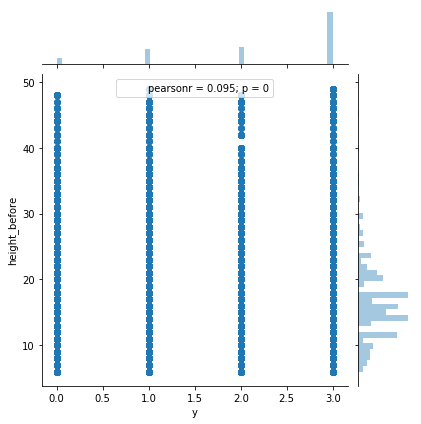

In [171]:
sns.jointplot(data=trainData, x='y', y='height_before')

### height_after

In [172]:
trainData['height_after'].describe()

count    644987.000000
mean         10.298891
std           8.521341
min           0.000000
25%           0.000000
50%          12.000000
75%          16.000000
max          49.000000
Name: height_after, dtype: float64

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


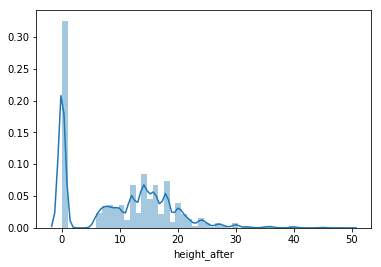

In [173]:
sns.distplot(trainData['height_after'])

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


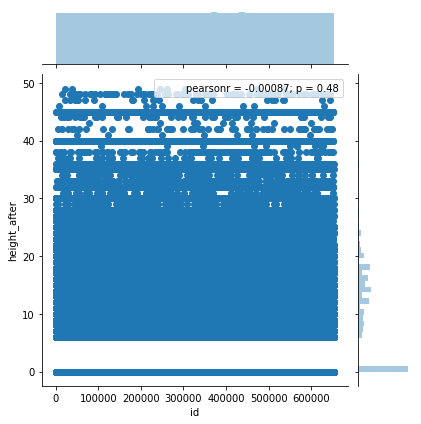

In [174]:
sns.jointplot(data=trainData, x='id', y='height_after')

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


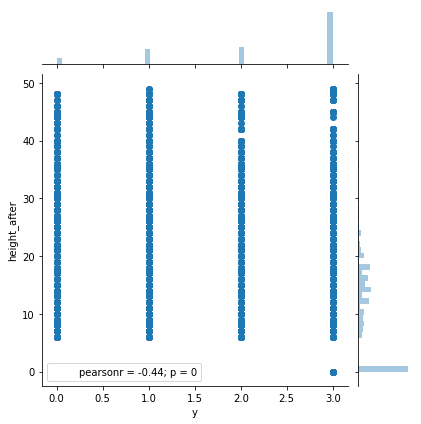

In [175]:
sns.jointplot(data=trainData, x='y', y='height_after')

### 独热编码

In [176]:
position = trainData['position']
land_condition = trainData['land_condition']
foundation_type = trainData['foundation_type']
roof_type = trainData['roof_type']
ground_floor_type = trainData['ground_floor_type']

trainData = pd.get_dummies(trainData, columns=['position', 'land_condition', 'foundation_type', 'roof_type', 'ground_floor_type'])

## 属性构造

In [177]:
trainData.describe()

,id,district_id,area_id,floors_before,floors_after,age,area,height_before,height_after,y,position_Attached-1 side,position_Attached-2 side,position_Attached-3 side,position_Not attached,land_condition_F,land_condition_M,land_condition_S,foundation_type_B,foundation_type_C,foundation_type_M,foundation_type_O,foundation_type_R,roof_type_H,roof_type_L,roof_type_R,ground_floor_type_B,ground_floor_type_M,ground_floor_type_O,ground_floor_type_R,ground_floor_type_T
count,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.00000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000,644987.000000
mean,326469.572046,2.367459,2.133214,2.129733,1.325403,22.619723,417.570269,16.253557,10.298891,2.287798,0.164606,0.050248,0.008827,0.776320,0.830128,0.137649,0.032222,0.058207,0.054144,0.84247,0.005515,0.039664,0.236611,0.702211,0.061178,0.096044,0.805136,0.001981,0.092972,0.003867
std,188479.534361,1.743203,1.556427,0.718165,1.088199,18.808169,230.014277,5.469331,8.521341,0.958533,0.370825,0.218455,0.093534,0.416711,0.375520,0.344532,0.176590,0.234135,0.226301,0.36430,0.074057,0.195170,0.425002,0.457287,0.239657,0.294652,0.396097,0.044469,0.290394,0.062063
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163234.500000,1.000000,1.000000,2.000000,0.000000,10.000000,284.000000,13.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,326488.000000,2.000000,3.000000,2.000000,2.000000,18.000000,364.000000,16.000000,12.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,489674.500000,4.000000,3.000000,2.000000,2.000000,30.000000,492.000000,19.000000,16.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,652936.000000,5.000000,5.000000,9.000000,9.000000,176.000000,5000.000000,49.000000,49.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
corr = trainData.corr()

``` python
plt.subplots(figsize=(30, 30)) # 设置画面大小
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('./BluesStateRelation.png')
plt.show()
```

In [179]:
corr['y'].sort_values(ascending=False)

y                           1.000000
foundation_type_M           0.414113
ground_floor_type_M         0.283176
age                         0.222218
floors_before               0.192760
district_id                 0.122338
roof_type_L                 0.097213
height_before               0.094980
roof_type_H                 0.082415
position_Attached-1 side    0.058592
land_condition_S            0.018032
position_Attached-3 side    0.017995
land_condition_M            0.016435
ground_floor_type_B         0.002914
id                          0.000941
position_Attached-2 side   -0.012019
ground_floor_type_T        -0.016830
ground_floor_type_O        -0.022835
land_condition_F           -0.023559
foundation_type_O          -0.030112
position_Not attached      -0.049879
area_id                    -0.113985
area                       -0.149299
foundation_type_C          -0.172373
foundation_type_B          -0.205903
foundation_type_R          -0.314671
roof_type_R                -0.331644
g

In [180]:
trainData['per_floor_height_before'] = trainData['height_before'] / trainData['floors_before']
trainData['per_floor_height_after'] = trainData['height_after'] / trainData['floors_after']

In [181]:
trainData["age_area"] = trainData['age'] / trainData['area']

In [182]:
land_condition.replace(['F', 'M', 'S'], [1, 2, 3], inplace=True)

In [183]:
foundation_type.replace(['M', 'C', 'R', 'B', 'O'], [5, 4, 3, 2, 1], inplace=True)

In [184]:
roof_type.replace(['L', 'H', 'R'], [3, 2, 1], inplace=True)

In [185]:
ground_floor_type.replace(['M', 'R', 'B', 'T', 'O'], [5, 4, 3, 2, 1], inplace=True)

In [186]:
trainData['4_rebuild'] = land_condition + foundation_type + roof_type + ground_floor_type

In [187]:
trainData['l_f'] = land_condition + foundation_type

In [188]:
trainData['l_r'] = land_condition + roof_type

In [189]:
trainData['l_g'] = land_condition + ground_floor_type

In [190]:
trainData['f_r'] = foundation_type + roof_type

In [191]:
trainData['f_g'] = foundation_type + ground_floor_type

In [192]:
trainData['r_g'] = roof_type + ground_floor_type

In [203]:
train = trainData.drop(['y', 'id'], axis=1)
y = trainData['y']

[1]	valid_0's multi_logloss: 1.30581
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.23983
[3]	valid_0's multi_logloss: 1.18414
[4]	valid_0's multi_logloss: 1.13701
[5]	valid_0's multi_logloss: 1.0959
[6]	valid_0's multi_logloss: 1.05979
[7]	valid_0's multi_logloss: 1.02843
[8]	valid_0's multi_logloss: 1.00048
[9]	valid_0's multi_logloss: 0.976116
[10]	valid_0's multi_logloss: 0.953709
[11]	valid_0's multi_logloss: 0.934468
[12]	valid_0's multi_logloss: 0.916502
[13]	valid_0's multi_logloss: 0.900951
[14]	valid_0's multi_logloss: 0.886955
[15]	valid_0's multi_logloss: 0.8744
[16]	valid_0's multi_logloss: 0.863103
[17]	valid_0's multi_logloss: 0.852863
[18]	valid_0's multi_logloss: 0.842821
[19]	valid_0's multi_logloss: 0.834125
[20]	valid_0's multi_logloss: 0.826447
[21]	valid_0's multi_logloss: 0.819269
[22]	valid_0's multi_logloss: 0.812763
[23]	valid_0's multi_logloss: 0.806556
[24]	valid_0's multi_logloss: 0.801282
[25]	valid_0's multi_lo

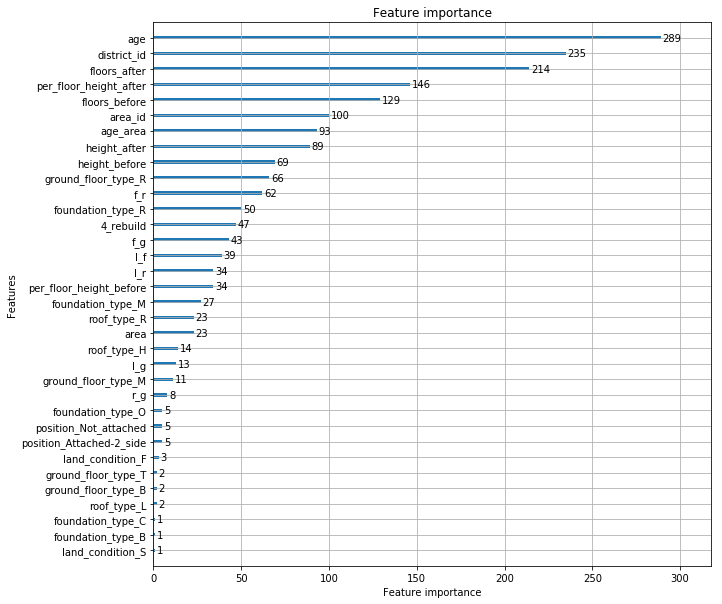

In [204]:
import lightgbm as lgb

params = {
    'learning_rate':0.1,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':4,
    'objective':'multiclass',
    'num_class':4
}

lgb_train = lgb.Dataset(train, y)
lgb_eval = lgb.Dataset(train, y)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
lgb.plot_importance(gbm, figsize=(10,10))